## Transfer Learning ResNet50 using Keras

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
import zipfile

#local_zip = '/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/4_Cotton_disease/dataDir.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp')
#zip_ref.close()

In [5]:
base_dir = '/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/4_Cotton_disease/dataDir'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


In [6]:
train_dir

'/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/4_Cotton_disease/dataDir/train'

In [7]:
train_fnames = os.listdir(train_dir)
print(train_fnames)

['fresh cotton plant', 'fresh cotton leaf', 'diseased cotton leaf', 'diseased cotton plant']


In [8]:
# re-size all the images to this size
IMAGE_SIZE = [224, 224]

In [9]:
# Importing the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
# [3] is added for RGB channels

resnet = ResNet50(input_shape= IMAGE_SIZE + [3], weights = 'imagenet', include_top= False)

In [10]:
# In transfer learning we already have the trained weights, so we wont train them
for layer in resnet.layers:
  layer.trainable = False

In [11]:
# To get number of output classes
folders = glob('/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/4_Cotton_disease/dataDir/train/*')
folders

['/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/4_Cotton_disease/dataDir/train/fresh cotton plant',
 '/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/4_Cotton_disease/dataDir/train/fresh cotton leaf',
 '/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/4_Cotton_disease/dataDir/train/diseased cotton leaf',
 '/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/4_Cotton_disease/dataDir/train/diseased cotton plant']

In [12]:
len(folders)  # No. of output classses

4

In [13]:
# No. of layers in the last output
x= Flatten()(resnet.output)

In [14]:
prediction =  Dense(len(folders), activation='softmax')(x)

# Create a model object
model = Model(inputs = resnet.input, outputs = prediction )

In [15]:
# Check the summary and structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [16]:
#COST AND OPTIMIZATION

# Telling the model which cost and optimization method to use
model.compile(
               loss='categorical_crossentropy',
               optimizer = 'adam',
              metrics = ['accuracy']
               )

In [17]:
# IMPORT THE IMAGE DATASET

# Use the Image Data Generator to IMPORT THE IMAGE DATASET
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [18]:
# CREATE THE TRAINING SET

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [20]:
test_set = test_datagen.flow_from_directory(test_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 40 images belonging to 4 classes.


In [21]:
# FIT THE MODEL

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 310s 5s/step - loss: 3.6758 - accuracy: 0.3803 - val_loss: 1.2408 - val_accuracy: 0.6250
Epoch 2/20
61/61 [==============================] - 299s 5s/step - loss: 1.0392 - accuracy: 0.5859 - val_loss: 1.0634 - val_accuracy: 0.5750
Epoch 3/20
61/61 [==============================] - 303s 5s/step - loss: 0.9877 - accuracy: 0.6243 - val_loss: 0.7485 - val_accuracy: 0.6500
Epoch 4/20
61/61 [==============================] - 300s 5s/step - loss: 0.8264 - accuracy: 0.6658 - val_loss: 0.9995 - val_accuracy: 0.6000
Epoch 5/20
61/61 [==============================] - 303s 5s/step - loss: 1.0066 - accuracy: 0.6427 - val_loss: 0.8883 - val_accuracy: 0.6250
Epoch 6/20
61/61 [==============================] - 301s 5s/step - loss: 0.9482 - accuracy: 0.6417 - val_loss: 1.1988 - val_accuracy: 0.6250
Epoch 7/20
61/61 [==============================] - 303s 5s/step - loss: 0.930

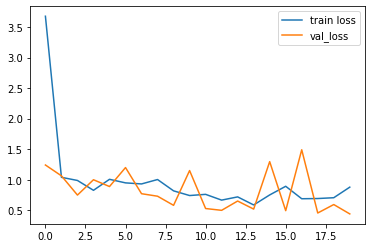

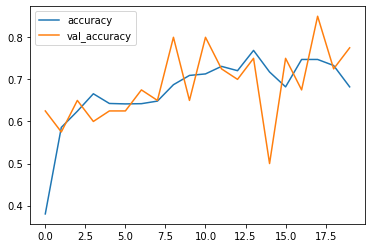

In [26]:
# Ploting the loss
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

print('\n')

# Ploting the accuracy
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [27]:
# Making the prediction 
y_pred = model.predict(test_set)

In [30]:
y_pred

array([[1.78808623e-04, 9.22323234e-05, 9.97636437e-01, 2.09258590e-03],
       [1.92429265e-03, 7.38155723e-01, 4.38044226e-04, 2.59482026e-01],
       [9.98620868e-01, 6.10156800e-04, 5.89221090e-05, 7.10139808e-04],
       [9.15535260e-04, 9.97153911e-05, 9.75648463e-01, 2.33362541e-02],
       [3.19004012e-03, 2.11824756e-02, 9.63136971e-01, 1.24904411e-02],
       [6.79385863e-08, 2.16237850e-09, 9.99999762e-01, 7.95210156e-08],
       [5.22291812e-04, 1.90419350e-02, 8.60628128e-01, 1.19807646e-01],
       [2.97683764e-05, 1.51396031e-02, 2.39358898e-02, 9.60894704e-01],
       [1.11840002e-03, 8.15592885e-01, 8.81614280e-04, 1.82406992e-01],
       [9.09022987e-01, 8.43663290e-02, 5.07164332e-05, 6.55988418e-03],
       [2.64432281e-03, 5.66142960e-04, 9.73079264e-01, 2.37103049e-02],
       [1.51706836e-03, 3.43428820e-01, 8.68168399e-02, 5.68237245e-01],
       [2.14578733e-01, 7.61258602e-01, 8.29868077e-06, 2.41543632e-02],
       [3.76245007e-05, 1.70773461e-07, 9.99960542e

* Note that we obtain an array of probablities for each class for each product
* The prediction of the model is for the class with highest probablity




In [31]:
y_pred.shape  # For 40 images we are getting an array of probabilites for each class

(40, 4)

In [33]:
import numpy as np
final_pred = np.argmax(y_pred, axis=1)

In [34]:
final_pred

array([2, 1, 0, 2, 2, 2, 2, 3, 1, 0, 2, 3, 1, 2, 1, 0, 3, 0, 2, 3, 1, 3,
       2, 2, 2, 2, 2, 1, 3, 3, 0, 3, 1, 3, 1, 0, 1, 1, 3, 3])



**Inference : So final_pred array show the predicted class to which the image belongs**




In [32]:
# Run this code to save the model as a h5 file

#from tensorflow.keras.models import load_model
#from tensorflow.keras.models import load_model
#model.save('cotton_resnet50.h5')

#### Now we will try to predict a complete new image by using our model



In [35]:
from tensorflow.keras.preprocessing import image

In [36]:
img=image.load_img('/content/drive/My Drive/Colab Notebooks/1_Data_science_projects/4_Cotton_disease/dataDir/test/fresh cotton leaf/d (106)_iaip.jpg',
                   target_size=(224,224))



*  So we have taken our image from test set only and from 3rd class.ie. that is fresh cotton leaf
*   We need to check what our model predicts



In [37]:
x=image.img_to_array(img)  # Image is converted to tensors having pixel values 
x

array([[[166., 225., 141.],
        [175., 233., 149.],
        [175., 230., 147.],
        ...,
        [ 62.,  56.,  42.],
        [ 68.,  60.,  37.],
        [ 69.,  61.,  38.]],

       [[188., 243., 160.],
        [181., 236., 153.],
        [178., 233., 150.],
        ...,
        [ 62.,  56.,  42.],
        [ 73.,  65.,  42.],
        [ 78.,  70.,  47.]],

       [[192., 244., 162.],
        [173., 226., 144.],
        [169., 224., 141.],
        ...,
        [ 63.,  57.,  43.],
        [ 76.,  68.,  45.],
        [ 93.,  85.,  62.]],

       ...,

       [[ 69., 146.,  50.],
        [115., 199.,  39.],
        [131., 216.,   0.],
        ...,
        [ 53., 146.,  55.],
        [ 67., 144.,  50.],
        [ 69., 146.,  52.]],

       [[116., 174.,  12.],
        [139., 203.,  18.],
        [137., 209.,   3.],
        ...,
        [ 57., 143.,  34.],
        [ 59., 144.,  43.],
        [ 63., 148.,  47.]],

       [[141., 202.,  19.],
        [139., 205.,   9.],
        [128., 2

In [38]:
x.shape

(224, 224, 3)

In [39]:
x = x/225

In [40]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [42]:
# Now predict
model.predict(img_data)

array([[6.4128704e-05, 1.7267151e-20, 9.9993587e-01, 1.8560278e-24]],
      dtype=float32)

In [43]:
a=np.argmax(model.predict(img_data), axis=1)

In [44]:
if a == 0:
    print('diseased cotton leaf')
elif a == 1:
    print('diseased cotton plant')
elif a == 2:
    print('fresh cotton leaf')
else:
    print('fresh cotton planr')

fresh cotton leaf


**Our prediction is correct.. so  model is performing well and can be used to detect cotton disease**

In [ ]:
# End